# P3C2 Améliorez un jeu de données

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/OpenClassrooms-Student-Center/8063076-Initiez-vous-au-Machine-Learning/blob/master/notebooks/P3C2_ameliorer_dataset.ipynb)

Dans ce notebook nous allons nous attaquer aux problèmes des données manquantes  et à celui des outliers (données aberrantes)

Nous travaillons sur le dataset des arbres de Paris


Vous trouverez les versions suivantes du datasets

- sur le site [opendata de Paris](https://opendata.paris.fr/explore/dataset/les-arbres/information)
- version [brute](https://github.com/OpenClassrooms-Student-Center/8063076-Initiez-vous-au-Machine-Learning/blob/master/data/paris-arbres-2023-09-07.csv) extraite le 10-09-2023, le séparateur est ';'
- version [exploitable](https://github.com/OpenClassrooms-Student-Center/8063076-Initiez-vous-au-Machine-Learning/blob/master/data/paris-arbres-clean-2023-09-10.csv): les colonnes ont été renommées, le séparateur est ','
- version [numerisée](https://github.com/OpenClassrooms-Student-Center/8063076-Initiez-vous-au-Machine-Learning/blob/master/data/paris-arbres-numerical-2023-09-10.csv): les catégories textuelles ont été numérisé de facon séquentielle

Ici nous travaillons sur la version _exploitable_


In [189]:
import pandas as pd
import matplotlib.pyplot as plt

In [190]:
dataset_url = "https://raw.githubusercontent.com/OpenClassrooms-Student-Center/8063076-Initiez-vous-au-Machine-Learning/master/data/paris-arbres-clean-2023-09-10.csv"
df = pd.read_csv(dataset_url)

/var/folders/31/b9pwgxyd4rz86p81hzwb44bm0000gn/T/ipykernel_25236/3948492116.py:2: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataset_url)


En résumé nous obtenons un dataset

- 221201 échantillons
- 16 colonnes
- les variables suivantes:
    - localisation: domanialite, arrondissement, complement_adresse, numero, lieu_adresse, geo_point_2d
    - nature des arbres: libelle_francais, genre, espece, variete_oucultivar, remarquable
    - les mensurations:  circonference_cm et hauteur_m, stade_de_developpement
    - les ID: idbase, idemplacement
 

In [191]:
df.head()

,idbase,domanialite,arrondissement,complement_adresse,numero,lieu_adresse,idemplacement,libelle_francais,genre,espece,variete_oucultivar,circonference_cm,hauteur_m,stade_de_developpement,remarquable,geo_point_2d
0,256032,Alignement,PARIS 14E ARRDT,NaN,NaN,RUE VERCINGETORIX,000602025,Erable,Acer,pseudoplatanus,''Atropurpureum'',70.0,6.0,Jeune (arbre),NON,"48.83154687478726, 2.3093726893065596"
1,281618,Alignement,PARIS 8E ARRDT,NaN,NaN,AVENUE DES CHAMPS ELYSEES,000305044,Marronnier,Aesculus,hippocastanum,''Baumannii'',20.0,4.0,Jeune (arbre),NON,"48.86665704304558, 2.3162802812024443"
2,302647,Jardin,PARIS 8E ARRDT,Secteur Kiosque,NaN,JARDINS DES CHAMPS ELYSEES - ABORDS DU KIOSQUE...,000109003,If,Taxus,baccata,NaN,50.0,5.0,Jeune (arbre)Adulte,NON,"48.86594098488487, 2.3177825326579695"
3,238226,Alignement,PARIS 12E ARRDT,37,NaN,AVENUE DE SAINT MANDE,000501020,Platane,Platanus,x hispanica,NaN,30.0,5.0,Jeune (arbre),NON,"48.84515461889761, 2.4008303350818525"
4,110978,Jardin,PARIS 19E ARRDT,NaN,NaN,PARC DES BUTTES CHAUMONT,K69K0040,Pin,Pinus,nigra,NaN,100.0,10.0,NaN,NaN,"48.87971709048107, 2.3797109748696337"


In [192]:
df.shape

(221201, 16)

In [193]:
df.columns

Index(['idbase', 'domanialite', 'arrondissement', 'complement_adresse',
       'numero', 'lieu_adresse', 'idemplacement', 'libelle_francais', 'genre',
       'espece', 'variete_oucultivar', 'circonference_cm', 'hauteur_m',
       'stade_de_developpement', 'remarquable', 'geo_point_2d'],
      dtype='object')

In [194]:
df.describe()

,circonference_cm,hauteur_m
count,207640.000000,207640.000000
mean,81.139703,8.817737
std,62.986148,6.128331
min,0.000000,0.000000
25%,30.000000,5.000000
50%,70.000000,8.000000
75%,115.000000,12.000000
max,1680.000000,710.000000


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221201 entries, 0 to 221200
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   idbase                  221201 non-null  object 
 1   domanialite             221201 non-null  object 
 2   arrondissement          221201 non-null  object 
 3   complement_adresse      58957 non-null   object 
 4   numero                  1 non-null       object 
 5   lieu_adresse            221200 non-null  object 
 6   idemplacement           207641 non-null  object 
 7   libelle_francais        206436 non-null  object 
 8   genre                   207638 non-null  object 
 9   espece                  205163 non-null  object 
 10  variete_oucultivar      39718 non-null   object 
 11  circonference_cm        207640 non-null  float64
 12  hauteur_m               207640 non-null  float64
 13  stade_de_developpement  160839 non-null  object 
 14  remarquable         

In [196]:
df.domanialite.value_counts(dropna = False)

domanialite
Alignement      107115
Jardin           63467
CIMETIERE        31920
DASCO             7249
PERIPHERIQUE      5225
DJS               4732
DFPE              1408
DAC                 66
DASES               18
000101001            1
Name: count, dtype: int64

In [197]:
df.espece.value_counts(dropna = False)

espece
x hispanica      36687
hippocastanum    19898
NaN              16038
japonicum        11905
tomentosa         8992
                 ...  
cathayana            1
pekinensis           1
vilmorinii           1
henryi               1
macrophyllum         1
Name: count, Length: 560, dtype: int64

# Les platanes

Nous travaillons sur un subset composé uniquement des Platanes, soit 42588 arbres

In [198]:
df = df[df.libelle_francais == 'Platane'].copy()

df.shape

(42588, 16)

la variable stade_de_developpement a 3350 valeurs manquantes (NaN)


In [199]:
df.stade_de_developpement.value_counts(dropna = False)

stade_de_developpement
Adulte                 21620
Jeune (arbre)Adulte     8356
Jeune (arbre)           5916
NaN                     3350
Mature                  3346
Name: count, dtype: int64

On suppose que la valeur _Jeune (arbre)Adulte_ est une valeur intermédiaire entre les catégories _Jeune (arbre)_ et _Adulte_. 

On a donc la graduation: Jeune (arbre), Jeune (arbre)Adulte, Adulte puis Mature.

## Visualisation

regardons la distribution des hauteur et circonference en fonction des stades de developpement

Ordonnons le dataset en fonction de l'ordre du stade de développement

In [200]:

cats = ['Jeune (arbre)', 'Jeune (arbre)Adulte', 'Adulte', 'Mature']

for n, cat in zip(range(1, 5), cats):
    df.loc[df.stade_de_developpement == cat, 'stade_num'] = n
df.sort_values(by = 'stade_num', inplace = True)
df.reset_index(inplace = True, drop = True)

Enlevons les valeurs manquantes de stade de developpement et limitons les mensurations pour avoir une meilleure figure


In [201]:
cond = ~df.stade_de_developpement.isna() & (df.circonference_cm < 400) & (df.hauteur_m < 40)

df[cond].shape

(39119, 17)

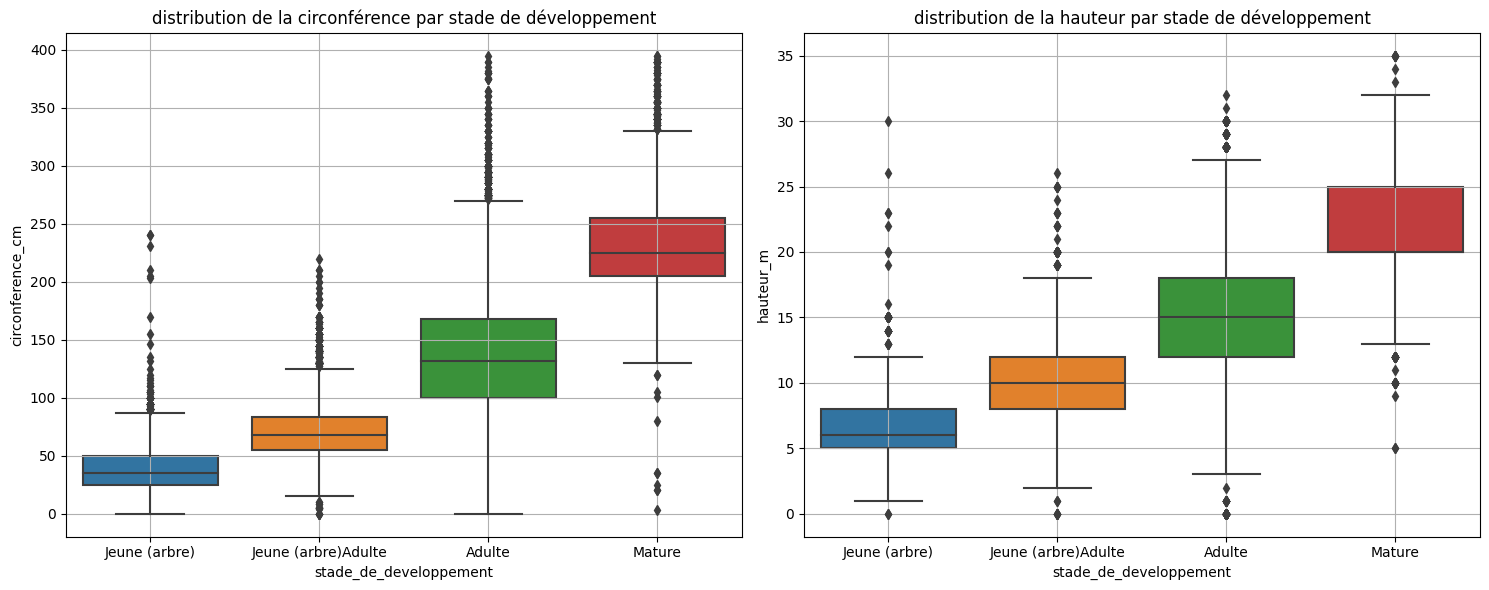

In [202]:
import seaborn as sns

fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(1, 2, 1)
sns.boxplot(data = df[cond], y="circonference_cm", x="stade_de_developpement")
ax.grid(True, which = 'both')
ax.set_title('distribution de la circonférence par stade de développement')

ax = fig.add_subplot(1, 2, 2)
sns.boxplot(data = df[cond], y="hauteur_m", x="stade_de_developpement")
ax.grid(True, which = 'both')
ax.set_title('distribution de la hauteur par stade de développement')

plt.tight_layout()



Nous pouvons visuellement choisir les seuils de hauteur et de circonference pour determiner le stade de  developpement de l'arbre 

## Inferer les valeurs manquantes par une regression

Construisons maintenant une regression logistique pour determiner le seuil de developpement de l'arbre en fonction de ses mensurations

state_de_developpement ~ hauteur_n + circonference_cm

nous avons deja numérisé le stadede developpement dans la variable _stade_num_


In [203]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

cond = ~df.stade_de_developpement.isna()

X = df[cond][['hauteur_m','circonference_cm']]
y = df[cond].stade_num

# Scaling
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.20)

clf = LogisticRegression(random_state = 0).fit(X_train,y_train)

print(f"Score de la classification R^2: ", clf.score(X_test, y_test))

Score de la classification R^2:  0.7385321100917431


In [204]:
# classification report

from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.80      0.71      0.75      1172
         2.0       0.65      0.38      0.48      1628
         3.0       0.74      0.96      0.84      4386
         4.0       0.73      0.19      0.30       662

    accuracy                           0.74      7848
   macro avg       0.73      0.56      0.59      7848
weighted avg       0.73      0.74      0.71      7848



Regardons maintenant combien d'arbres dont le stade_de_developpement est manquant seraient classés par stade de developpement

In [205]:
X_missing = scaler.transform( df[~cond][['hauteur_m','circonference_cm']]   )

y_missing = clf.predict(X_missing)



In [206]:
y_missing

array([3., 1., 1., ..., 1., 1., 1.])

In [207]:
import numpy as np
np.unique(y_missing, return_counts=True)[1]


array([2913,   23,  382,   32])

soit 2913 Jeune arbres et 32 Mature

# Outliers

Regardons les outliers au niveau des mensurations des arbres

In [209]:
dataset_url = "https://raw.githubusercontent.com/OpenClassrooms-Student-Center/8063076-Initiez-vous-au-Machine-Learning/master/data/paris-arbres-clean-2023-09-10.csv"
df = pd.read_csv(dataset_url)
df = df[df.libelle_francais == 'Platane'].copy()


/var/folders/31/b9pwgxyd4rz86p81hzwb44bm0000gn/T/ipykernel_25236/3720863360.py:2: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataset_url)


Text(0.5, 1.0, 'Platanes')

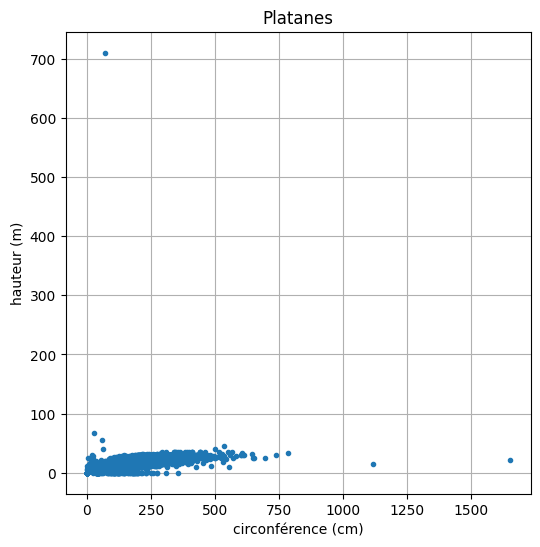

In [210]:

fig = plt.figure(figsize=(6, 6))
plt.plot(df.circonference_cm, df.hauteur_m, '.')
plt.grid()
plt.xlabel('circonférence (cm)')
plt.ylabel('hauteur (m)')
plt.title('Platanes')


In [211]:
df = df[(df.circonference_cm < 1000) & (df.hauteur_m < 100)].copy()



## Methode du Z-score

Le z-score mesure de combien d'écart-types une valeur est éloigné de la moyenne de la variable. 

On considère qu'un z-score supérieur à 2 ou 3 correspond à un outlier.

In [212]:
from scipy import stats
df['z_circonference'] = stats.zscore(df.circonference_cm)
df['z_hauteur'] = stats.zscore(df.hauteur_m)

Text(0.5, 1.0, 'hauteur - z-score')

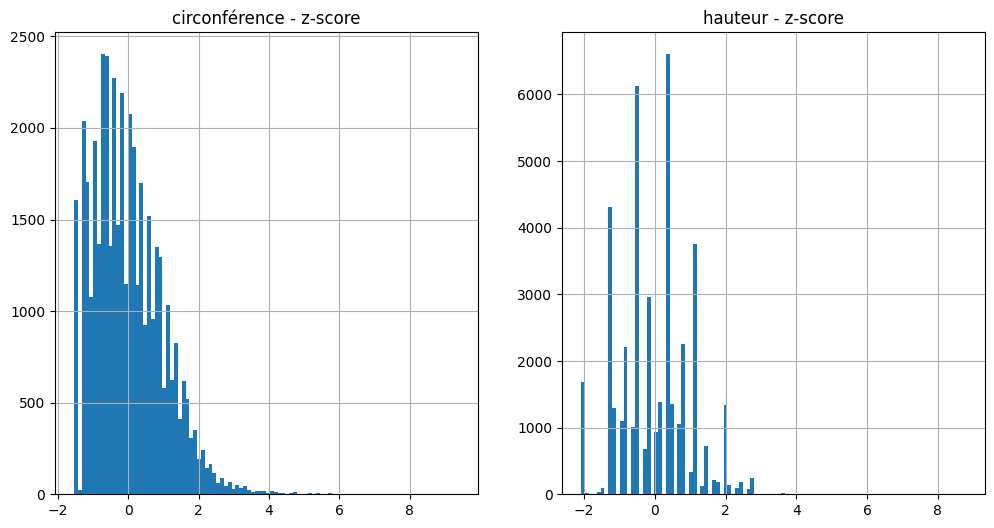

In [213]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1)
df.z_circonference.hist(bins = 100)
ax.grid(True, which = 'both')
ax.set_title('circonférence - z-score')
ax = fig.add_subplot(1, 2, 2)
df.z_hauteur.hist(bins = 100)
ax.grid(True, which = 'both')
ax.set_title('hauteur - z-score')


# Autres exemples de données manquantes

Il se trouve que 1688 platanes ont une hauteur nulle (égale à 0) et 1592 ont une circonférence aussi égale à 0

En ce qui concerne la hauteur, il se peut que cela soit dû à la discrétisation observée précédemment et donc au mode de mesure utilisé. 

Pour la circonférence par contre, ces valeurs nulles sont plus probablement des valeurs manquantes.

Comment remplaceriez-vous ces valeurs nulle (=0) par des valeurs qui font sens ?

Regardez maintenant les autres principales espèces du dataset (df.libelle_francais.value_counts()) comme le Marronnier ou le Tilleul. Ces espèces ont-elles des données manquantes ou des outliers? comment les traiterez vous après les avoir identifiés ?
